## Fuzzy Inference System

<img src="images/image-1.png"/>

<img src="images/image-2.png"/>

<img src="images/image-3.png"/>

<img src="images/image-4.png"/>

<img src="images/image-4.png"/>

<img src="images/image-5.png"/>

In [2]:
class Fuzzy():

    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def rev_up(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min

# down
# fuzzy_value = (max - x) / (max - min)
# fuzzy_value * (max - min) = max - x
# fuzzy_value * (max - min) - max = -x
# -x = fuzzy_value * (max - min) - max
# x = max - fuzzy_value * (max - min)

# up
# fuzzy_value = (x - min) / (max - min)
# fuzzy_value * (max - min) = x - min
# fuzzy_value * (max - min) + min = x
# x = fuzzy_value * (max - min) + min
    


In [3]:
# Permintaan
# himpunan Turun/Naik
fis = Fuzzy()
fis.min = 1000
fis.max = 5000
x = 4000

turun = fis.down(x)
print(f"Himpunan turun: {turun}")

naik = fis.up(x)
print(f"Himpunan naik: {naik}")

Himpunan turun: 0.25
Himpunan naik: 0.75


In [4]:
# Persediaan
# himpunan sedikit/ banyak
fis = Fuzzy()
fis.min = 100
fis.max = 600
x = 300

sedikit = fis.down(x)
print(f"Himpunan sedikit: {sedikit}")

banyak = fis.up(x)
print(f"Himpunan banyak: {banyak}")

Himpunan sedikit: 0.6
Himpunan banyak: 0.4


In [5]:
# produksi
# himpunan berkurang/bertambah
fis = Fuzzy()
# berkurang
fis.min = 2000
fis.max = 7000
fuzzy_value = 0.25

berkurang = fis.rev_down(fuzzy_value)
print(f"Himp berkurang: {berkurang}")

#Bertambah
fuzzy_value = 0.4
bertambah = fis.rev_up(fuzzy_value)
print(f"Himp bertambah: {bertambah}")

fuzzy_value = 0.6
bertambah = fis.rev_up(fuzzy_value)
print(f"Himp bertambah: {bertambah}")

Himp berkurang: 5750.0
Himp bertambah: 4000.0
Himp bertambah: 5000.0


In [6]:
# Permintaan = Demand
# turun = decrease
# naik = increase
# Persediaan = Stock
# sedikit = a_few
# banyak = a_lot
# Produksi = Production
# berkurang = reduce
# bertambah = add

In [7]:
# Variabel Input
class Demand(Fuzzy):

    def __init__(self):
        self.min = 1000
        self.max = 5000

    def decrease(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def increase(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)


class Stock(Fuzzy):

    def __init__(self):
        self.min = 100
        self.max = 600

    def a_few(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def a_lot(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)

In [8]:
pmt = Demand()
pmt.increase(902)


0

In [9]:
# Variabel Output

class Production(Fuzzy):

    def __init__(self):
        self.min = 2000
        self.max = 7000

    def reduce(self, fuzzy_value):
        return self.rev_down(fuzzy_value)
    def add(self, fuzzy_value):
        return self.rev_up(fuzzy_value)
    

In [10]:
prod = Production()
fuzzy_value = 1

prod.reduce(fuzzy_value)

2000

In [11]:
fuzzy_value = 1
prod.add(fuzzy_value)

7000

In [12]:
rule_map = {
    ("decrease", "a_lot"): "reduce",
    ("decrease", "a_few"): "reduce",
    ("increase", "a_lot"): "add",
    ("increase", "a_few"): "add"
}

In [13]:
rule_map[("decrease", "a_few")]

'reduce'

In [14]:
rule_num = 1
real_fuzzy_sum = 0
fuzzy_sum = 0
for k,v in rule_map.items():
    # print(f"rule ke-{rule_num}")
    # print(f"himpunan permintaan:{k[0]}")
    # print(f"himpunan persediaan:{k[1]}")
    # print(f"himpunan produksi:{v}")
    # rule_num +=1
    demand_value = 4000
    stock_value = 300
    demand = Demand()
    stock = Stock()
    prod = Production()
    fuzzy_demand = demand.decrease(demand_value) if k[0] == "decrease" else demand.increase(demand_value)
    fuzzy_stock = stock.a_few(stock_value) if k[1] == "a_few" else stock.a_lot(stock_value)
    fuzzy_prod = min(fuzzy_demand, fuzzy_stock)
    # print(fuzzy_prod)
    real_prod = prod.reduce(fuzzy_prod) if v == "reduce" else prod.add(fuzzy_prod)
    # print(fuzzy_real)
    real_fuzzy_sum += fuzzy_prod * real_prod
    fuzzy_sum += fuzzy_prod

result = int(real_fuzzy_sum / fuzzy_sum)

print(f"Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak {result} kemasan.")

    

Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak 4983 kemasan.


## Tugas Latihan
- Buat gambar grafik di bawah dengan menggunakan hasil perhitungan dari code yang sudah dibuat sebelumnya

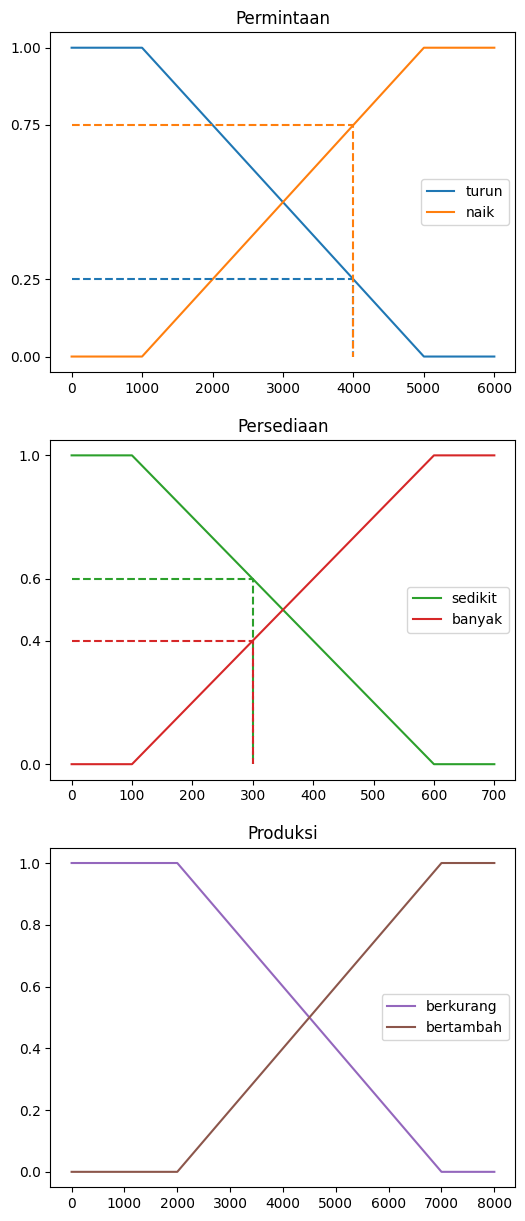